Época | Peso w1 | Peso w2 | Sesgo b | Salida y_pred | Error
-----------------------------------------------------------------
    1 |  0.0000 |  0.0000 |  0.0000 |  0.0000 | 24.5000
    2 |  0.2100 |  0.2800 |  0.0700 |  1.8200 | 13.4162
    3 |  0.3654 |  0.4872 |  0.1218 |  3.1668 |  7.3467
    4 |  0.4804 |  0.6405 |  0.1601 |  4.1634 |  4.0231
    5 |  0.5655 |  0.7540 |  0.1885 |  4.9009 |  2.2030
    6 |  0.6285 |  0.8380 |  0.2095 |  5.4467 |  1.2064
    7 |  0.6751 |  0.9001 |  0.2250 |  5.8506 |  0.6606
    8 |  0.7095 |  0.9461 |  0.2365 |  6.1494 |  0.3618
    9 |  0.7351 |  0.9801 |  0.2450 |  6.3706 |  0.1981
   10 |  0.7539 |  1.0053 |  0.2513 |  6.5342 |  0.1085
   11 |  0.7679 |  1.0239 |  0.2560 |  6.6553 |  0.0594
   12 |  0.7783 |  1.0377 |  0.2594 |  6.7449 |  0.0325
   13 |  0.7859 |  1.0479 |  0.2620 |  6.8113 |  0.0178
   14 |  0.7916 |  1.0554 |  0.2639 |  6.8603 |  0.0098
   15 |  0.7958 |  1.0610 |  0.2653 |  6.8966 |  0.0053
   16 |  0.7989 |  1.0652 |  0.266

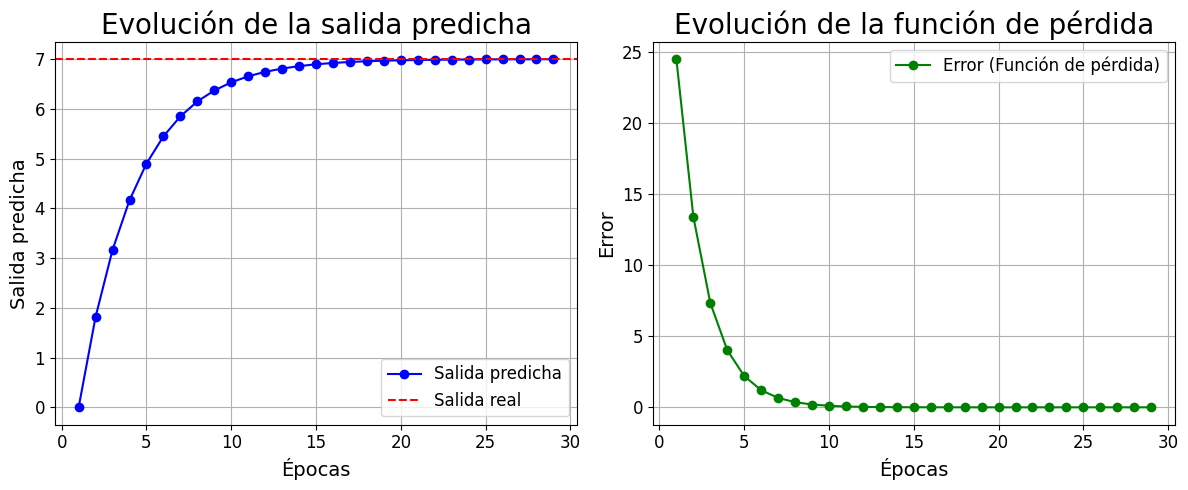

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
x = np.array([3, 4])  # Entradas x_1 y x_2
y_true = 7            # Salida esperada

# Inicialización de pesos y sesgo
w = np.array([0.0, 0.0])  # Pesos w_1 y w_2
b = 0.0                   # Sesgo
eta = 0.01                # Tasa de aprendizaje
epochs = 100              # Número máximo de épocas
tol = 1e-6                # Tolerancia para detener el entrenamiento
prev_error = float('inf')  # Inicializar error anterior

# Listas para almacenar datos para graficar
epoch_list = []  # Almacena las épocas
y_pred_list = []  # Almacena la salida predicha
error_list = []  # Almacena los valores de error

print("Época | Peso w1 | Peso w2 | Sesgo b | Salida y_pred | Error")
print("-" * 65)

# Entrenamiento
for epoch in range(epochs):
    y_pred = np.dot(w, x) + b  # Cálculo de la salida del perceptrón

    # Cálculo del error
    error = 0.5 * (y_true - y_pred)**2

    # Almacenar valores para graficar
    epoch_list.append(epoch + 1)
    y_pred_list.append(y_pred)
    error_list.append(error)

    # Mostrar valores en cada época
    print(f"{epoch+1:5d} | {w[0]:7.4f} | {w[1]:7.4f} | {b:7.4f} | {y_pred:7.4f} | {error:7.4f}")

    # Verificar si la mejora en el error es menor que la tolerancia
    if abs(prev_error - error) < tol:
        print(f"\nEntrenamiento detenido en la época {epoch+1} porque la mejora en el error es menor que {tol:.1e}")
        break

    prev_error = error  # Actualizar el error anterior

    # Actualización de pesos y sesgo (descenso del gradiente)
    w += eta * (y_true - y_pred) * x
    b += eta * (y_true - y_pred)

# Resultado final
print("\nModelo entrenado:")
print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}, b = {b:.4f}")

# --- Visualización de los resultados ---

plt.figure(figsize=(12, 5))

# Gráfico de la salida predicha
plt.subplot(1, 2, 1)
plt.plot(epoch_list, y_pred_list, label="Salida predicha", marker="o", linestyle="-", color="b")
plt.axhline(y=y_true, color="r", linestyle="--", label="Salida real")
plt.xlabel("Épocas", fontsize=14)  # Etiqueta del eje X más grande
plt.ylabel("Salida predicha", fontsize=14)  # Etiqueta del eje Y más grande
plt.title("Evolución de la salida predicha", fontsize=20)  # Título más grande
plt.legend(fontsize=12)  # Aumentar tamaño de la leyenda
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y
plt.grid()

# Gráfico de la función de pérdida
plt.subplot(1, 2, 2)
plt.plot(epoch_list, error_list, label="Error (Función de pérdida)", marker="o", linestyle="-", color="g")
plt.xlabel("Épocas", fontsize=14)  # Etiqueta del eje X más grande
plt.ylabel("Error", fontsize=14)  # Etiqueta del eje Y más grande
plt.title("Evolución de la función de pérdida", fontsize=20)  # Título más grande
plt.legend(fontsize=12)  # Aumentar tamaño de la leyenda
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y
plt.grid()

plt.tight_layout()
plt.show()

Entrenamiento detenido en la época 75 por convergencia.


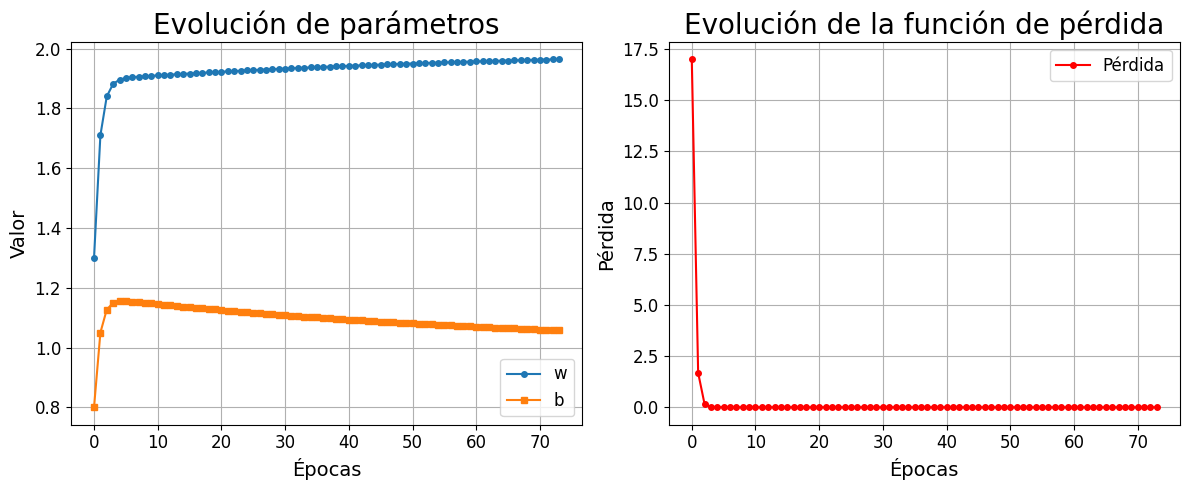

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
X = np.array([1, 2])  # Variable de entrada
y_real = np.array([3, 5])  # Valores esperados

# Inicialización de parámetros
w = 0.0
b = 0.0
eta = 0.1  # Tasa de aprendizaje
epochs = 200  # Número máximo de épocas
tol = 1e-5  # Umbral de tolerancia para detener el entrenamiento

# Listas para visualizar la convergencia
w_list, b_list, loss_list = [], [], []
prev_loss = float("inf")  # Inicializamos la pérdida con un valor grande

# Entrenamiento del perceptrón
for epoch in range(epochs):
    y_pred = w * X + b  # Predicción
    error = y_real - y_pred  # Error
    loss = 0.5 * np.sum(error**2)  # Función de pérdida

    # Verificar si el error no cambia significativamente
    if abs(prev_loss - loss) < tol:
        print(f"Entrenamiento detenido en la época {epoch + 1} por convergencia.")
        break
    prev_loss = loss  # Actualizar la pérdida anterior

    # Gradientes
    grad_w = -np.sum(error * X)  # Derivada respecto a w
    grad_b = -np.sum(error)  # Derivada respecto a b

    # Actualización de parámetros
    w -= eta * grad_w
    b -= eta * grad_b

    # Almacenar valores
    w_list.append(w)
    b_list.append(b)
    loss_list.append(loss)

# Visualización de la convergencia y la recta ajustada
plt.figure(figsize=(12, 5))

# Gráfico 1: Evolución de los parámetros
plt.subplot(1, 2, 1)
plt.plot(w_list, label="w", marker="o", markersize=4)
plt.plot(b_list, label="b", marker="s", markersize=4)
plt.xlabel("Épocas", fontsize=14)  # Etiqueta del eje X más grande
plt.ylabel("Valor", fontsize=14)  # Etiqueta del eje Y más grande
plt.title("Evolución de parámetros", fontsize=20)  # Título más grande
plt.legend(fontsize=12)  # Tamaño de la leyenda más grande
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y
plt.grid()

# Gráfico 2: Evolución de la función de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss_list, label="Pérdida", marker="o", markersize=4, color="red")
plt.xlabel("Épocas", fontsize=14)  # Etiqueta del eje X más grande
plt.ylabel("Pérdida", fontsize=14)  # Etiqueta del eje Y más grande
plt.title("Evolución de la función de pérdida", fontsize=20)  # Título más grande
plt.legend(fontsize=12)  # Tamaño de la leyenda más grande
plt.xticks(fontsize=12)  # Tamaño de los valores en el eje X
plt.yticks(fontsize=12)  # Tamaño de los valores en el eje Y
plt.grid()

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

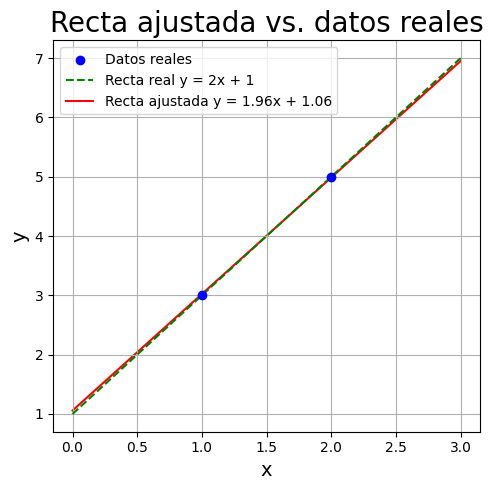

In [ ]:
# Visualización de la convergencia y la recta ajustada
plt.figure(figsize=(5, 5))
# Gráfico 3: Recta ajustada vs. datos reales
X_plot = np.linspace(0, 3, 100)  # Puntos para dibujar la recta
y_pred_plot = w * X_plot + b  # Recta ajustada
y_real_plot = 2 * X_plot + 1  # Recta real (suponiendo que la real es y = 2x + 1)

plt.scatter(X, y_real, color="blue", label="Datos reales", zorder=3)
plt.plot(X_plot, y_real_plot, 'g--', label="Recta real y = 2x + 1", zorder=2)
plt.plot(X_plot, y_pred_plot, 'r-', label=f"Recta ajustada y = {w:.2f}x + {b:.2f}", zorder=1)

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Recta ajustada vs. datos reales", fontsize=20)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

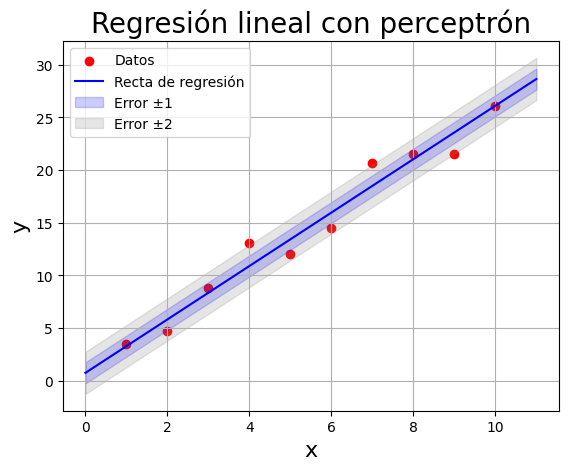

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 10 puntos aleatorios que no estén perfectamente alineados
np.random.seed(42)  # Para reproducibilidad
X = np.linspace(1, 10, 10).reshape(-1, 1)  # 10 valores equidistantes entre 1 y 10
y = 2.5 * X.flatten() + np.random.normal(0, 2, size=X.shape[0])  # Relación lineal con ruido

# Inicializar los parámetros del perceptrón (peso y sesgo)
w = np.random.randn(1)  # Peso inicial aleatorio
b = np.random.randn()   # Sesgo inicial aleatorio
learning_rate = 0.01    # Tasa de aprendizaje
epochs = 1000           # Número de iteraciones

# Función de activación lineal
def activation(x):
    return x

# Entrenamiento del perceptrón usando descenso de gradiente
for epoch in range(epochs):
    for xi, yi in zip(X, y):
        # Calcular la salida del modelo
        y_pred = activation(np.dot(xi, w) + b)
        # Calcular el error
        error = yi - y_pred
        # Actualizar los parámetros
        w += learning_rate * error * xi
        b += learning_rate * error

# Función de predicción
def predict(x):
    return activation(np.dot(x, w) + b)

# Generar valores para la recta de regresión
x_line = np.linspace(0, 11, 100).reshape(-1, 1)  # Valores entre 0 y 11 para la gráfica
y_line = predict(x_line)  # Predicción con el modelo entrenado

# Crear regiones de error
error_0_2_upper = y_line + 1
error_0_2_lower = y_line - 1

error_0_5_upper = y_line + 2
error_0_5_lower = y_line - 2

# Graficar los puntos, la recta de regresión y las regiones de error
plt.scatter(X, y, color='red', label='Datos')
plt.plot(x_line, y_line, color='blue', label='Recta de regresión')

# Dibujar las bandas de error
plt.fill_between(x_line.flatten(), error_0_2_lower.flatten(), error_0_2_upper.flatten(),
                 color='blue', alpha=0.2, label='Error ±1')
plt.fill_between(x_line.flatten(), error_0_5_lower.flatten(), error_0_5_upper.flatten(),
                 color='gray', alpha=0.2, label='Error ±2')

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.title('Regresión lineal con perceptrón', fontsize=20)
plt.grid(True)
plt.show()


Entrenamiento detenido en la época 73 porque la mejora en el error es menor que 1.0e-10

Modelo entrenado:
w1 = 1.0000, w2 = 1.0000


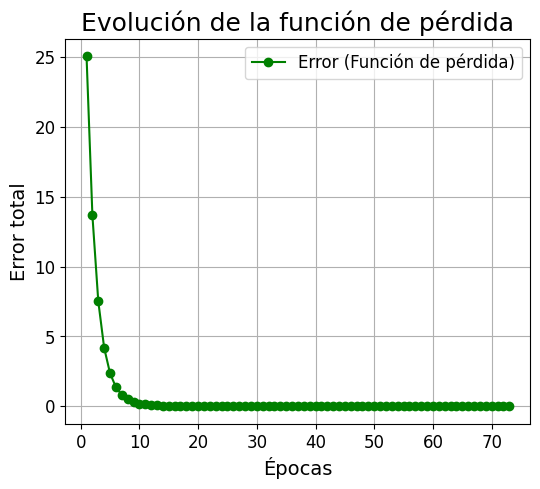

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (dos puntos)
X = np.array([[1, 5], [4, 0]])  # Entradas x_1 y x_2
y_true = np.array([6, 4])        # Salidas esperadas

# Inicialización de pesos y sesgo
w = np.array([0.0, 0.0])  # Pesos w_1 y w_2
eta = 0.01                # Tasa de aprendizaje
epochs = 1000              # Número máximo de épocas
tol = 1e-10                # Tolerancia para detener el entrenamiento
prev_error = float('inf')  # Inicializar error anterior

# Listas para almacenar datos para graficar
epoch_list = []
error_list = []

#print("Época | Peso w1 | Peso w2 | Error total")
#print("-" * 55)

# Entrenamiento
for epoch in range(epochs):
    total_error = 0  # Inicializar el error total para esta época

    for i in range(len(X)):
        y_pred = np.dot(w, X[i]) + b  # Cálculo de la salida del perceptrón
        error = 0.5 * (y_true[i] - y_pred) ** 2  # Función de pérdida cuadrática
        total_error += error  # Sumar error total

        # Actualización de pesos y sesgo (descenso del gradiente)
        w += eta * (y_true[i] - y_pred) * X[i]

    # Almacenar valores para graficar
    epoch_list.append(epoch + 1)
    error_list.append(total_error)

    # Mostrar valores en cada época
    #print(f"{epoch+1:5d} | {w[0]:7.4f} | {w[1]:7.4f} | {total_error:.6f}")

    # Verificar si la mejora en el error es menor que la tolerancia
    if abs(prev_error - total_error) < tol:
        print(f"\nEntrenamiento detenido en la época {epoch+1} porque la mejora en el error es menor que {tol:.1e}")
        break

    prev_error = total_error  # Actualizar el error anterior

# Resultado final
print("\nModelo entrenado:")
print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}")

# --- Visualización de la función de pérdida ---

plt.figure(figsize=(6, 5))
plt.plot(epoch_list, error_list, label="Error (Función de pérdida)", marker="o", linestyle="-", color="g")
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Error total", fontsize=14)
plt.title("Evolución de la función de pérdida", fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()


Entrenamiento detenido en la época 70 porque la mejora en el error es menor que 1.0e-10

Modelo entrenado:
w1 = 0.9078, w2 = 0.9447, b = 0.3687


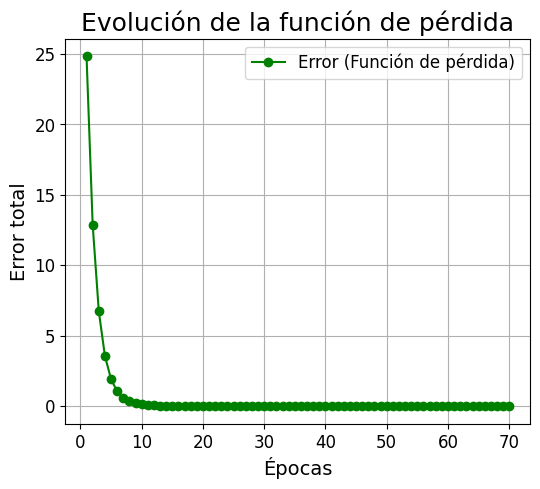

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (dos puntos)
X = np.array([[1, 5], [4, 0]])  # Entradas x_1 y x_2
y_true = np.array([6, 4])        # Salidas esperadas

# Inicialización de pesos y sesgo
w = np.array([0.0, 0.0])  # Pesos w_1 y w_2
b = 0.0                   # Sesgo
eta = 0.01                # Tasa de aprendizaje
epochs = 1000              # Número máximo de épocas
tol = 1e-10                # Tolerancia para detener el entrenamiento
prev_error = float('inf')  # Inicializar error anterior

# Listas para almacenar datos para graficar
epoch_list = []
error_list = []

#print("Época | Peso w1 | Peso w2 | Sesgo b | Error total")
#print("-" * 55)

# Entrenamiento
for epoch in range(epochs):
    total_error = 0  # Inicializar el error total para esta época

    for i in range(len(X)):
        y_pred = np.dot(w, X[i]) + b  # Cálculo de la salida del perceptrón
        error = 0.5 * (y_true[i] - y_pred) ** 2  # Función de pérdida cuadrática
        total_error += error  # Sumar error total

        # Actualización de pesos y sesgo (descenso del gradiente)
        w += eta * (y_true[i] - y_pred) * X[i]
        b += eta * (y_true[i] - y_pred)

    # Almacenar valores para graficar
    epoch_list.append(epoch + 1)
    error_list.append(total_error)

    # Mostrar valores en cada época
    #print(f"{epoch+1:5d} | {w[0]:7.4f} | {w[1]:7.4f} | {b:7.4f} | {total_error:.6f}")

    # Verificar si la mejora en el error es menor que la tolerancia
    if abs(prev_error - total_error) < tol:
        print(f"\nEntrenamiento detenido en la época {epoch+1} porque la mejora en el error es menor que {tol:.1e}")
        break

    prev_error = total_error  # Actualizar el error anterior

# Resultado final
print("\nModelo entrenado:")
print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}, b = {b:.4f}")

# --- Visualización de la función de pérdida ---

plt.figure(figsize=(6, 5))
plt.plot(epoch_list, error_list, label="Error (Función de pérdida)", marker="o", linestyle="-", color="g")
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Error total", fontsize=14)
plt.title("Evolución de la función de pérdida", fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()


Entrenamiento detenido en la época 766 porque la mejora en el error es menor que 1.0e-10

Modelo entrenado:
w1 = 1.0000, w2 = 1.0000, b = 0.0001


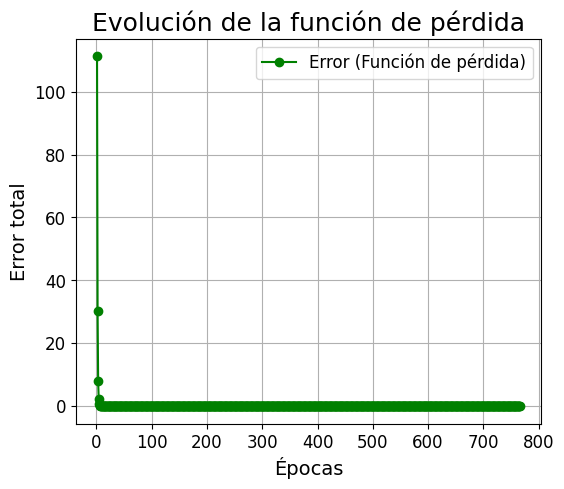

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (dos puntos)
X = np.array([[1, 5], [4, 0], [7, 11]])  # Entradas x_1 y x_2
y_true = np.array([6, 4, 18])        # Salidas esperadas

# Inicialización de pesos y sesgo
w = np.array([0.0, 0.0])  # Pesos w_1 y w_2
b = 0.0                   # Sesgo
eta = 0.01                # Tasa de aprendizaje
epochs = 1000              # Número máximo de épocas
tol = 1e-10                # Tolerancia para detener el entrenamiento
prev_error = float('inf')  # Inicializar error anterior

# Listas para almacenar datos para graficar
epoch_list = []
error_list = []

#print("Época | Peso w1 | Peso w2 | Sesgo b | Error total")
#print("-" * 55)

# Entrenamiento
for epoch in range(epochs):
    total_error = 0  # Inicializar el error total para esta época

    for i in range(len(X)):
        y_pred = np.dot(w, X[i]) + b  # Cálculo de la salida del perceptrón
        error = 0.5 * (y_true[i] - y_pred) ** 2  # Función de pérdida cuadrática
        total_error += error  # Sumar error total

        # Actualización de pesos y sesgo (descenso del gradiente)
        w += eta * (y_true[i] - y_pred) * X[i]
        b += eta * (y_true[i] - y_pred)

    # Almacenar valores para graficar
    epoch_list.append(epoch + 1)
    error_list.append(total_error)

    # Mostrar valores en cada época
    #print(f"{epoch+1:5d} | {w[0]:7.4f} | {w[1]:7.4f} | {b:7.4f} | {total_error:.6f}")

    # Verificar si la mejora en el error es menor que la tolerancia
    if abs(prev_error - total_error) < tol:
        print(f"\nEntrenamiento detenido en la época {epoch+1} porque la mejora en el error es menor que {tol:.1e}")
        break

    prev_error = total_error  # Actualizar el error anterior

# Resultado final
print("\nModelo entrenado:")
print(f"w1 = {w[0]:.4f}, w2 = {w[1]:.4f}, b = {b:.4f}")

# --- Visualización de la función de pérdida ---

plt.figure(figsize=(6, 5))
plt.plot(epoch_list, error_list, label="Error (Función de pérdida)", marker="o", linestyle="-", color="g")
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Error total", fontsize=14)
plt.title("Evolución de la función de pérdida", fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()